In [7]:
pip install nba-api


[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguestandings, leaguegamefinder

 Fetch the current NBA standings using the LeagueStandings class from the nba-api

In [2]:
def get_standings():
    standings_data = leaguestandings.LeagueStandings().get_data_frames()[0]
    return standings_data


In [3]:
standing_data = get_standings()
standing = standing_data[['TeamCity','TeamName','Conference','WinPCT','PlayoffRank']]
standing

,TeamCity,TeamName,Conference,WinPCT,PlayoffRank
0,Denver,Nuggets,West,0.676,1
1,Milwaukee,Bucks,East,0.720,1
2,Boston,Celtics,East,0.693,2
3,Memphis,Grizzlies,West,0.635,2
4,Philadelphia,76ers,East,0.662,3
5,Sacramento,Kings,West,0.608,3
6,Cleveland,Cavaliers,East,0.632,4
7,Phoenix,Suns,West,0.533,4
8,LA,Clippers,West,0.520,5
9,New York,Knicks,East,0.566,5


Graph show the win percentages of every teams

In [62]:
def plot_win_percentages(east_teams, west_teams):
    east_teams = east_teams[['TeamName', 'WinPCT']].sort_values('WinPCT', ascending=False)
    west_teams = west_teams[['TeamName', 'WinPCT']].sort_values('WinPCT', ascending=False)

    fig, ax = plt.subplots(2, 1, figsize=(12, 12))

    ax[0].bar(east_teams['TeamName'], east_teams['WinPCT'])
    ax[0].set_title('Eastern Conference Win Percentages')
    ax[0].set_ylabel('Win Percentage')
    ax[0].tick_params(axis='x', rotation=45)

    ax[1].bar(west_teams['TeamName'], west_teams['WinPCT'])
    ax[1].set_title('Western Conference Win Percentages')
    ax[1].set_ylabel('Win Percentage')
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


In [63]:
def get_top_teams(standing, num_teams=8):
    east_teams = standing[standing['Conference'] == 'East'].head(num_teams)
    west_teams = standing[standing['Conference'] == 'West'].head(num_teams)
    return east_teams, west_teams

In [64]:
get_top_teams(standing, num_teams=8)

(        TeamCity   TeamName Conference  WinPCT  PlayoffRank
 1      Milwaukee      Bucks       East   0.714            1
 3   Philadelphia      76ers       East   0.686            2
 4         Boston    Celtics       East   0.681            3
 6      Cleveland  Cavaliers       East   0.616            4
 9       New York     Knicks       East   0.583            5
 11      Brooklyn       Nets       East   0.557            6
 12         Miami       Heat       East   0.528            7
 15       Atlanta      Hawks       East   0.500            8,
         TeamCity      TeamName Conference  WinPCT  PlayoffRank
 0         Denver       Nuggets       West   0.662            1
 2     Sacramento         Kings       West   0.614            2
 5        Memphis     Grizzlies       West   0.614            3
 7        Phoenix          Suns       West   0.543            4
 8             LA      Clippers       West   0.521            5
 10        Dallas     Mavericks       West   0.507            6
 1

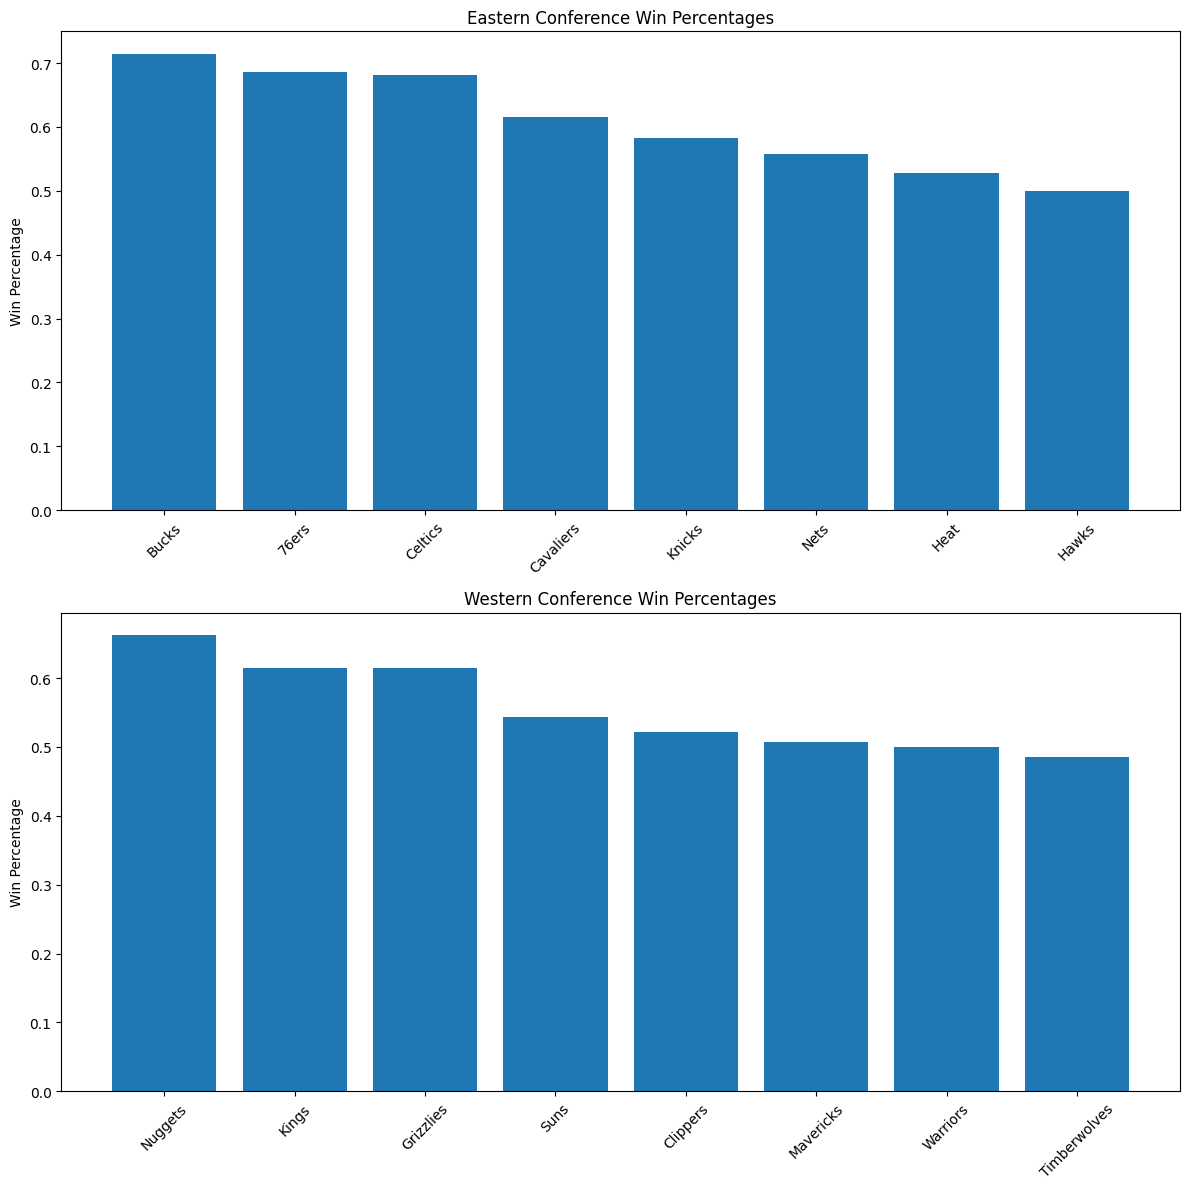

In [65]:
east_teams, west_teams = get_top_teams(standing)

plot_win_percentages(east_teams, west_teams)


Filter the top 8 teams of each conference bases on Win Percentage and Playoff Rank 

In [66]:
standing = standing_data[['TeamName','Conference','WinPCT']]
standing

,TeamName,Conference,WinPCT
0,Nuggets,West,0.662
1,Bucks,East,0.714
2,Kings,West,0.614
3,76ers,East,0.686
4,Celtics,East,0.681
5,Grizzlies,West,0.614
6,Cavaliers,East,0.616
7,Suns,West,0.543
8,Clippers,West,0.521
9,Knicks,East,0.583


In [67]:
def predict_final_champion(east_teams, west_teams):
    east_champion = east_teams.iloc[east_teams['WinPCT'].idxmax()]
    west_champion = west_teams.iloc[west_teams['WinPCT'].idxmax()]

    if east_champion['WinPCT'] < west_champion['WinPCT']:
        return west_champion['TeamName']
    else:
        return east_champion['TeamName']

In [68]:
east_champion = east_teams.iloc[east_teams['WinPCT'].idxmax()]
east_champion

TeamCity       Philadelphia
TeamName              76ers
Conference             East
WinPCT                0.686
PlayoffRank               2
Name: 3, dtype: object

In [69]:
west_champion = west_teams.iloc[west_teams['WinPCT'].idxmax()]
west_champion

TeamCity        Denver
TeamName       Nuggets
Conference        West
WinPCT           0.662
PlayoffRank          1
Name: 0, dtype: object

In [70]:
east_teams, west_teams = get_top_teams(standing)
predicted_champion = predict_final_champion(east_teams, west_teams)
print(f"The predicted NBA final champion is: {predicted_champion}")

The predicted NBA final champion is: 76ers


In [58]:
nba_teams = teams.get_teams()
mavericks = [team for team in nba_teams if team['abbreviation'] == 'DAL'][0]
mavs_id = mavericks['id']
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=mavs_id)
games = gamefinder.get_data_frames()[0]
games.head()


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22022,1610612742,DAL,Dallas Mavericks,0022201054,2023-03-17,DAL @ LAL,W,240,111,...,0.789,7,28,35,27,8,4,13,26,1.0
1,22022,1610612742,DAL,Dallas Mavericks,0022201040,2023-03-15,DAL @ SAS,W,265,137,...,0.865,10,42,52,23,4,4,18,25,9.0
2,22022,1610612742,DAL,Dallas Mavericks,0022201023,2023-03-13,DAL vs. MEM,L,240,88,...,0.750,8,33,41,23,3,3,13,16,-16.0
3,22022,1610612742,DAL,Dallas Mavericks,0022201010,2023-03-11,DAL @ MEM,L,240,108,...,0.652,10,33,43,25,4,3,11,17,-4.0
4,22022,1610612742,DAL,Dallas Mavericks,0022200988,2023-03-08,DAL @ NOP,L,239,106,...,0.737,5,29,34,24,7,0,9,18,-7.0


In [15]:
print(standings_data.columns)


Index(['LeagueID', 'SeasonID', 'TeamID', 'TeamCity', 'TeamName', 'Conference',
       'ConferenceRecord', 'PlayoffRank', 'ClinchIndicator', 'Division',
       'DivisionRecord', 'DivisionRank', 'WINS', 'LOSSES', 'WinPCT',
       'LeagueRank', 'Record', 'HOME', 'ROAD', 'L10', 'Last10Home',
       'Last10Road', 'OT', 'ThreePTSOrLess', 'TenPTSOrMore', 'LongHomeStreak',
       'strLongHomeStreak', 'LongRoadStreak', 'strLongRoadStreak',
       'LongWinStreak', 'LongLossStreak', 'CurrentHomeStreak',
       'strCurrentHomeStreak', 'CurrentRoadStreak', 'strCurrentRoadStreak',
       'CurrentStreak', 'strCurrentStreak', 'ConferenceGamesBack',
       'DivisionGamesBack', 'ClinchedConferenceTitle', 'ClinchedDivisionTitle',
       'ClinchedPlayoffBirth', 'EliminatedConference', 'EliminatedDivision',
       'AheadAtHalf', 'BehindAtHalf', 'TiedAtHalf', 'AheadAtThird',
       'BehindAtThird', 'TiedAtThird', 'Score100PTS', 'OppScore100PTS',
       'OppOver500', 'LeadInFGPCT', 'LeadInReb', 'FewerTurnove

In [92]:
print(team_stats.columns)

Index(['GROUP_SET', 'GROUP_VALUE_ORDER', 'GROUP_VALUE', 'GROUP_VALUE_2', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'GP_RANK',
       'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK',
       'FG_PCT_RANK', 'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK',
       'FTA_RANK', 'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK',
       'AST_RANK', 'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK',
       'PFD_RANK', 'PTS_RANK', 'PLUS_MINUS_RANK'],
      dtype='object')
